### General Relativty describes the interaction between the geometry of spacetime and the energy-momentum of matter.

$G_{\mu\nu}$ + $\lambda g_{\mu\nu}$ = 8$\pi G T_{\mu\nu}$
 
Einstein's field equations are basically a set of coupled partial differential equations of components of the metric $g_{\mu\nu}$
. The metric defines the geometry of the space-time manifold.

On the left hand side we have the Einstein tensor $G_{\mu\nu}$ = $R_{\mu\nu}$ - 1/2 $g_{\mu\nu}$$R$ , where the Riemann tensor and Ricci scalar are complicated functions of the metric and its derivatives. Besides, we have $\lambda$ , which is a free constant parameter allowed by the theory, but which we now think is responsible for the accelerated expansion of the Universe.

The right hand side, with the tensor $T_{\mu\nu}$ 
 describes the energy and momentum of matter, a fluid, particles or the object in question (for example a star).

Youtube Video - https://www.youtube.com/watch?v=JRZgW1YjCKk (Stanford Lecture Series)

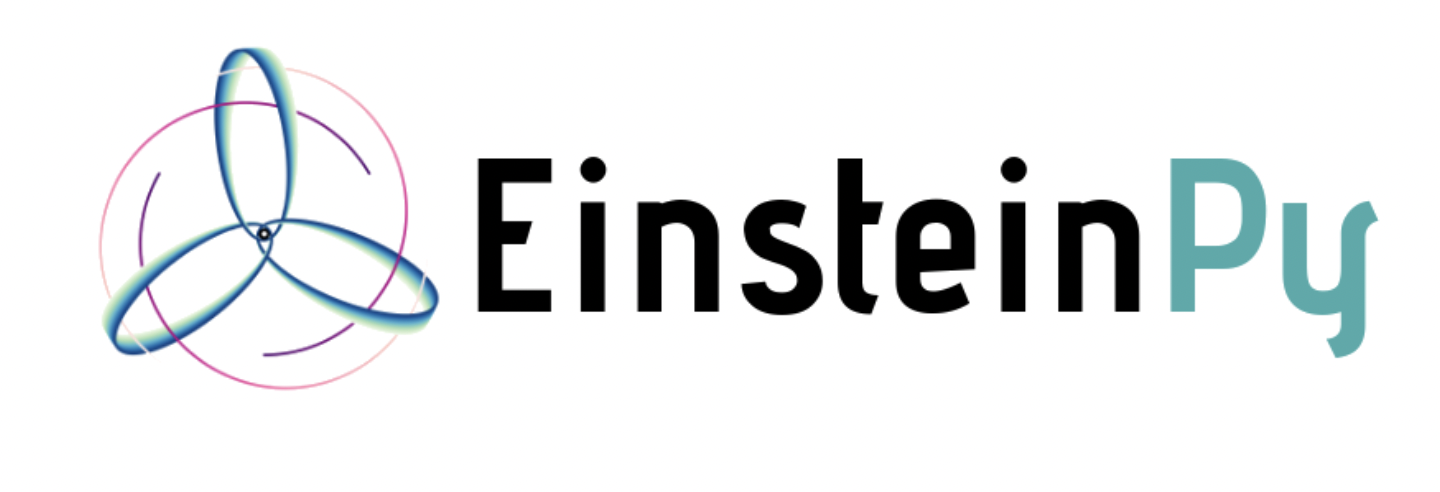

In [2]:
import sympy as smp
import einsteinpy 

#### Let's calculate the behavior of the "scale factor" of the Universe, that the Einstein equations predict, for a homogeneous and isotropic Universe filled with a perfect fluid.

In [16]:
G_00, T_00, G, rho = smp.symbols("G_{00} T_{00} G rho")

In [17]:
rho

rho

In [5]:
einst_eq = smp.Eq( G_00, 8 * smp.pi * G * T_00 )
einst_eq

Eq(G_{00}, 8*pi*G*T_{00})

In [6]:
# The energy-momentum tensor of a perfect fluid:

energy_momentum = smp.Eq(T_00, rho)
energy_momentum

Eq(T_{00}, \rho)

In [7]:
syms = smp.symbols("t x y z")
t, x, y, z = syms

In [8]:
a = smp.Function("a")  ##scale factor

__The line element of a homogeneous and isotropic Universe with no curvature. The metric elements are the coefficients in front of the coordinates.__
$ds^{2}$ = $g_{\mu\nu}$ $dx^{\mu}$ $dx^{\nu}$ = -$dt^{2}$ + $a^{2}(t)$($dx^{2}$+$dy^{2}$+$dz^{2}$)



In [9]:
from einsteinpy.symbolic import EinsteinTensor, MetricTensor
m = smp.diag(-1, a(t)**2, a(t)**2, a(t)** 2).tolist()
metric = MetricTensor(m, syms)

In [10]:
metric.tensor()

[[-1, 0, 0, 0], [0, a(t)**2, 0, 0], [0, 0, a(t)**2, 0], [0, 0, 0, a(t)**2]]

In [11]:
einst = EinsteinTensor.from_metric(metric)
einst.simplify()

[[3.0*Derivative(a(t), t)**2/a(t)**2, 0, 0, 0], [0, -2.0*a(t)*Derivative(a(t), (t, 2)) - 1.0*Derivative(a(t), t)**2, 0, 0], [0, 0, -2.0*a(t)*Derivative(a(t), (t, 2)) - 1.0*Derivative(a(t), t)**2, 0], [0, 0, 0, -2.0*a(t)*Derivative(a(t), (t, 2)) - 1.0*Derivative(a(t), t)**2]]

In [12]:
H = smp.symbols("H")

Let's define a new function, that we will cull the Hubble function and it will be the relative "velocity" of expansion of $a(t)$:

$H(t)$ = $a^{o}$/$a$

In [13]:
smp.Eq( H, smp.diff(a(t), t)/a(t))

Eq(H, Derivative(a(t), t)/a(t))

In [14]:
G_00s = einst[0,0]
G_00s = G_00s.subs(smp.diff(a(t), t)/a(t), H)
G_00s

3.0*H**2

In [15]:
einst_eq.subs(G_00, G_00s).subs(T_00, rho)

Eq(3.0*H**2, 8*pi*G*\rho)